In [1]:
#import Libraries
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Playground

In [2]:
apple = yf.Ticker("aapl")
apple

yfinance.Ticker object <AAPL>

In [3]:
#Get historical data
apple_data = apple.history(start ="2015-01-01", end=date.today(), interval="1d")
apple_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-25,127.820000,128.320007,126.320000,126.900002,72009500,0.0,0.0
2021-05-26,126.959999,127.389999,126.419998,126.849998,56575900,0.0,0.0
2021-05-27,126.440002,127.639999,125.080002,125.279999,94625600,0.0,0.0
2021-05-28,125.570000,125.800003,124.550003,124.610001,71311100,0.0,0.0
2021-06-01,125.080002,125.349998,123.940002,124.279999,67500600,0.0,0.0


## Yfinance Tickers symbol
Apple Inc: AAPL

NIO Inc: NIO

Bayerische Motoren Werke Aktiengesellschaft : BMW.DE

Volkswagen AG : VOW.DE

Daimeler AG: DAI.DE

Siemens Aktiengesellschaft : SIE.DE





 ## Data Visualization

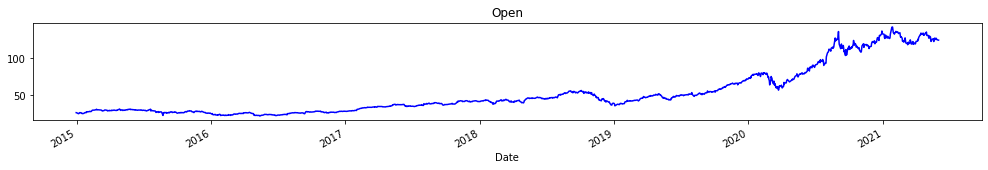

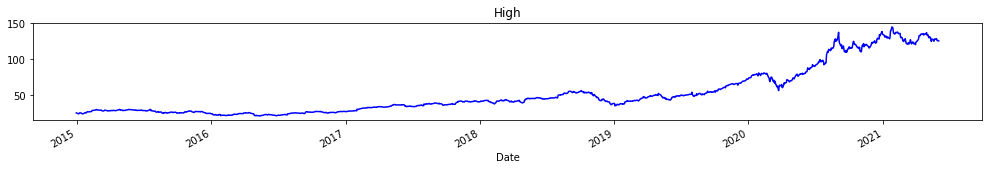

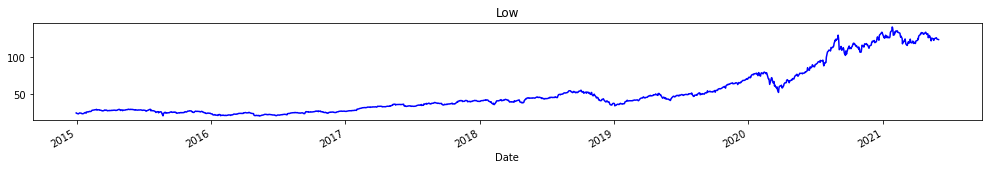

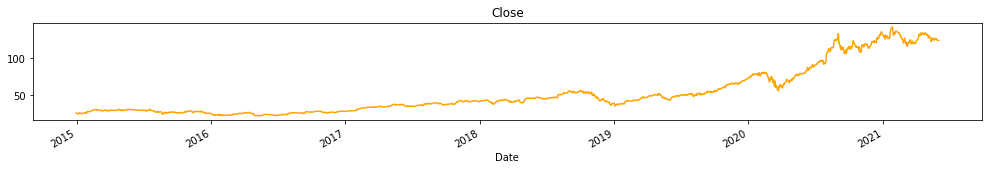

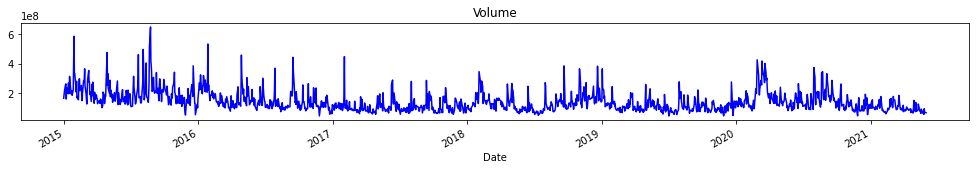

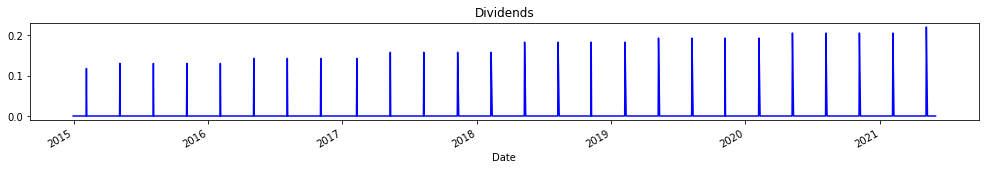

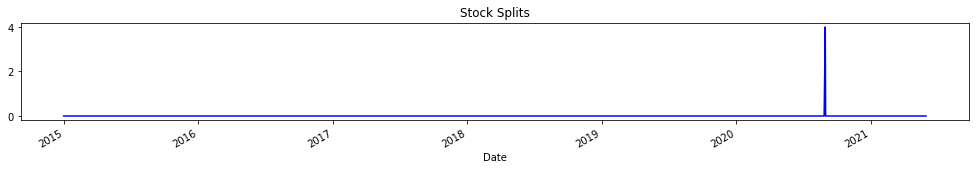

In [4]:
%matplotlib inline

for col in apple_data.columns:
    color="orange" if col == "Close" else "blue"
    apple_data[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()

## Data Preprocessing

In [5]:
apple_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1615.000000,1615.000000,1615.000000,1615.000000,1.615000e+03,1615.000000,1615.000000
mean,51.798273,52.353664,51.236364,51.814046,1.430782e+08,0.002711,0.002477
std,31.889019,32.306010,31.397209,31.857279,7.031557e+07,0.021527,0.099535
min,21.019165,21.409186,20.895382,21.098566,4.544800e+07,0.000000,0.000000
25%,28.182274,28.406262,27.954175,28.196112,9.506960e+07,0.000000,0.000000
50%,41.367637,41.678358,40.955157,41.300484,1.255220e+08,0.000000,0.000000
75%,58.522235,59.512202,57.941992,58.672216,1.693016e+08,0.000000,0.000000
max,143.142611,144.627854,140.919703,142.704010,6.488252e+08,0.220000,4.000000


In [6]:
apple_data.info

<bound method DataFrame.info of                   Open        High         Low       Close     Volume  \
Date                                                                    
2014-12-31   25.611516   25.681889   25.019014   25.057606  165613600   
2015-01-02   25.286885   25.298236   24.369756   24.819241  212818400   
2015-01-05   24.583150   24.664874   23.929355   24.120045  257142000   
2015-01-06   24.185883   24.387924   23.752289   24.122320  263188400   
2015-01-07   24.335706   24.562718   24.222200   24.460564  160423600   
...                ...         ...         ...         ...        ...   
2021-05-25  127.820000  128.320007  126.320000  126.900002   72009500   
2021-05-26  126.959999  127.389999  126.419998  126.849998   56575900   
2021-05-27  126.440002  127.639999  125.080002  125.279999   94625600   
2021-05-28  125.570000  125.800003  124.550003  124.610001   71311100   
2021-06-01  125.080002  125.349998  123.940002  124.279999   67500600   

            Divide

### Variables for training

In [7]:
cols = list(apple_data)[0:5]
cols

['Open', 'High', 'Low', 'Close', 'Volume']

In [8]:
df = apple_data[cols].astype(float)

<AxesSubplot:xlabel='Date'>

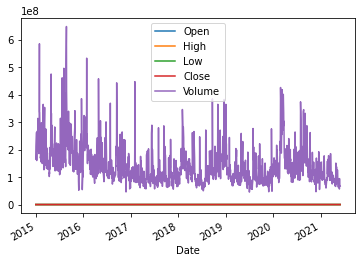

In [9]:
df.plot.line()

### Normalizing the Dataset with Standard Scaler

In [10]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-25,127.820000,128.320007,126.320000,126.900002,72009500.0
2021-05-26,126.959999,127.389999,126.419998,126.849998,56575900.0
2021-05-27,126.440002,127.639999,125.080002,125.279999,94625600.0
2021-05-28,125.570000,125.800003,124.550003,124.610001,71311100.0
2021-06-01,125.080002,125.349998,123.940002,124.279999,67500600.0


In [11]:
scaler = StandardScaler()
scaler = scaler.fit(df)
df_scaled = scaler.transform(df)

### Sequencing the Dataset

In [12]:
X_train = []
y_train = []

In [13]:
n_future = 1
n_lookback = 14

In [14]:
for i in range(n_lookback, len(df_scaled) - n_future + 1):
    X_train.append(df_scaled[i - n_lookback:i, 0:df_scaled.shape[1]])
    y_train.append(df_scaled[i + n_future - 1:i + n_future, 0])

In [15]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
print(f"X_train shape:, {X_train.shape}")
print(f"y_train shape:, {y_train.shape}")

X_train shape:, (1601, 14, 5)
y_train shape:, (1601, 1)


In [17]:
X_train[:14]

array([[[-0.82143852, -0.82585363, -0.83528032, -0.84014482,
          0.32058882],
        [-0.83162169, -0.83773289, -0.85596558, -0.84762942,
          0.99212461],
        [-0.85369679, -0.85734405, -0.86999667, -0.86958397,
          1.62267243],
        [-0.86615843, -0.86591942, -0.87563797, -0.86951252,
          1.70868856],
        [-0.86145872, -0.86050716, -0.86066668, -0.85889177,
          0.24675585],
        [-0.84700286, -0.83274201, -0.84620141, -0.82938123,
          1.34264772],
        [-0.82250673, -0.82501016, -0.83528037, -0.82852599,
          1.02028641],
        [-0.82300515, -0.82936818, -0.84547822, -0.84819957,
          0.78989909],
        [-0.83133682, -0.82817327, -0.84468271, -0.84128537,
          1.78236789],
        [-0.84835588, -0.84441037, -0.8476479 , -0.84427898,
          0.75039631],
        [-0.84152005, -0.84743323, -0.86095615, -0.86552114,
          1.37960689],
        [-0.86266946, -0.86486535, -0.87151571, -0.87143746,
          2.432

In [18]:
y_train[:14]

array([[-0.83966841],
       [-0.82514143],
       [-0.81488724],
       [-0.82428686],
       [-0.78718637],
       [-0.79651504],
       [-0.78170317],
       [-0.78419566],
       [-0.78099115],
       [-0.78099106],
       [-0.76679403],
       [-0.76679417],
       [-0.77730333],
       [-0.76572179]])

## Benchmark Score

In [19]:
1/5

0.2

In [20]:
from tensorflow.keras.optimizers import RMSprop

def init_model():
    
    model = Sequential()
    model.add(LSTM(40, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(10, return_sequences=True, activation='tanh'))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', 
                  optimizer=RMSprop(learning_rate=0.0003), 
                  metrics=['mae'])
    
    return model



In [21]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = init_model()
model1.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 40)            7360      
_________________________________________________________________
lstm_1 (LSTM)                (None, 14, 10)            2040      
_________________________________________________________________
dense (Dense)                (None, 14, 5)             55        
_________________________________________________________________
dropout (Dropout)            (None, 14, 5)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 14, 1)             6         
Total params: 9,461
Trainable params: 9,461
Non-trainable params: 0
_________________________________________________________________


In [22]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

history = model1.fit(X_train, y_train,validation_split=0.3,epochs=1000, batch_size=64,callbacks=[es], verbose=1)

Epoch 1/1000
18/18 [==============================] - 4s 67ms/step - loss: 0.3960 - mae: 0.5516 - val_loss: 3.9898 - val_mae: 1.6670
Epoch 2/1000
18/18 [==============================] - 0s 21ms/step - loss: 0.2909 - mae: 0.4632 - val_loss: 3.5151 - val_mae: 1.5617
Epoch 3/1000
18/18 [==============================] - 0s 26ms/step - loss: 0.1720 - mae: 0.3350 - val_loss: 3.2490 - val_mae: 1.4927
Epoch 4/1000
18/18 [==============================] - 1s 28ms/step - loss: 0.1252 - mae: 0.2751 - val_loss: 3.1315 - val_mae: 1.4570
Epoch 5/1000
18/18 [==============================] - 1s 47ms/step - loss: 0.0981 - mae: 0.2424 - val_loss: 3.0507 - val_mae: 1.4361
Epoch 6/1000
18/18 [==============================] - 1s 34ms/step - loss: 0.0783 - mae: 0.2124 - val_loss: 2.9421 - val_mae: 1.4082
Epoch 7/1000
18/18 [==============================] - 1s 36ms/step - loss: 0.0653 - mae: 0.1911 - val_loss: 2.8773 - val_mae: 1.3909
Epoch 8/1000
18/18 [==============================] - 1s 37ms/step - 

18/18 [==============================] - 0s 27ms/step - loss: 0.0150 - mae: 0.0928 - val_loss: 2.4053 - val_mae: 1.2461
Epoch 63/1000
18/18 [==============================] - 1s 28ms/step - loss: 0.0143 - mae: 0.0910 - val_loss: 2.3931 - val_mae: 1.2422
Epoch 64/1000
18/18 [==============================] - 1s 30ms/step - loss: 0.0146 - mae: 0.0925 - val_loss: 2.3916 - val_mae: 1.2415
Epoch 65/1000
18/18 [==============================] - 1s 29ms/step - loss: 0.0141 - mae: 0.0906 - val_loss: 2.3895 - val_mae: 1.2400
Epoch 66/1000
18/18 [==============================] - 1s 29ms/step - loss: 0.0145 - mae: 0.0922 - val_loss: 2.3848 - val_mae: 1.2385
Epoch 67/1000
18/18 [==============================] - 1s 35ms/step - loss: 0.0145 - mae: 0.0922 - val_loss: 2.3878 - val_mae: 1.2396
Epoch 68/1000
18/18 [==============================] - 0s 27ms/step - loss: 0.0146 - mae: 0.0911 - val_loss: 2.3820 - val_mae: 1.2373
Epoch 69/1000
18/18 [==============================] - 0s 27ms/step - loss: 

18/18 [==============================] - 1s 29ms/step - loss: 0.0110 - mae: 0.0778 - val_loss: 2.2176 - val_mae: 1.1734
Epoch 124/1000
18/18 [==============================] - 1s 28ms/step - loss: 0.0112 - mae: 0.0781 - val_loss: 2.2195 - val_mae: 1.1738
Epoch 125/1000
18/18 [==============================] - 1s 28ms/step - loss: 0.0105 - mae: 0.0762 - val_loss: 2.2011 - val_mae: 1.1672
Epoch 126/1000
18/18 [==============================] - 0s 28ms/step - loss: 0.0105 - mae: 0.0764 - val_loss: 2.2110 - val_mae: 1.1699
Epoch 127/1000
18/18 [==============================] - 1s 28ms/step - loss: 0.0108 - mae: 0.0768 - val_loss: 2.2034 - val_mae: 1.1674
Epoch 128/1000
18/18 [==============================] - 0s 28ms/step - loss: 0.0103 - mae: 0.0752 - val_loss: 2.1956 - val_mae: 1.1639
Epoch 129/1000
18/18 [==============================] - 0s 27ms/step - loss: 0.0107 - mae: 0.0766 - val_loss: 2.1981 - val_mae: 1.1643
Epoch 130/1000
18/18 [==============================] - 0s 28ms/step -

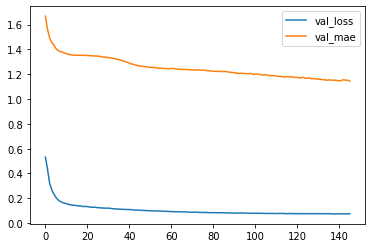

In [23]:
plt.plot(history.history['mae'], label="val_loss")
plt.plot(history.history['val_mae'], label="val_mae")
plt.legend()

## Using LSTM to Model and Predict Future Values

In [24]:
apple_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-25,127.820000,128.320007,126.320000,126.900002,72009500,0.0,0.0
2021-05-26,126.959999,127.389999,126.419998,126.849998,56575900,0.0,0.0
2021-05-27,126.440002,127.639999,125.080002,125.279999,94625600,0.0,0.0
2021-05-28,125.570000,125.800003,124.550003,124.610001,71311100,0.0,0.0
2021-06-01,125.080002,125.349998,123.940002,124.279999,67500600,0.0,0.0


# Data Preprocessing

In [25]:
nio = yf.Ticker("NIO")
nio

yfinance.Ticker object <NIO>

In [26]:
#Get historical data
nio_data = nio.history(start ="2015-01-01", end=date.today(), interval="1d")
nio_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-25,36.320000,37.639999,35.689999,36.070000,76628000,0,0
2021-05-26,36.250000,38.080002,36.070000,37.759998,55929000,0,0
2021-05-27,37.950001,38.980000,37.180000,38.910000,52933300,0,0
2021-05-28,38.740002,39.759998,38.169998,38.619999,58236000,0,0
2021-06-01,39.990002,42.439999,39.939999,42.340000,101295000,0,0


## Data Visualization

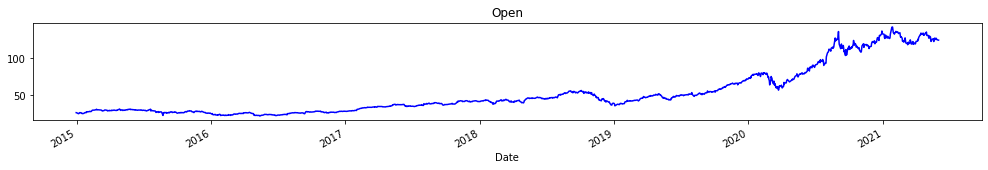

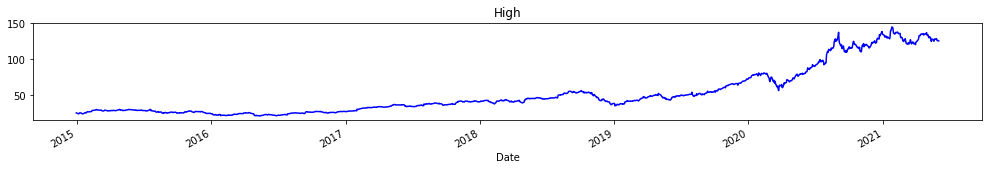

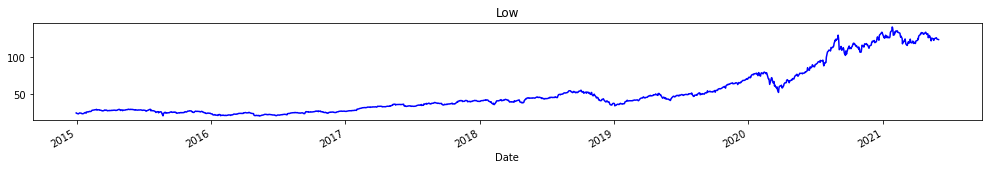

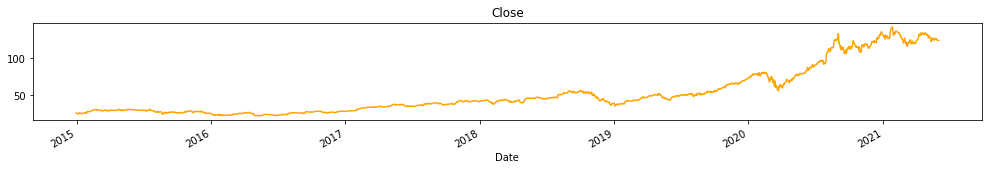

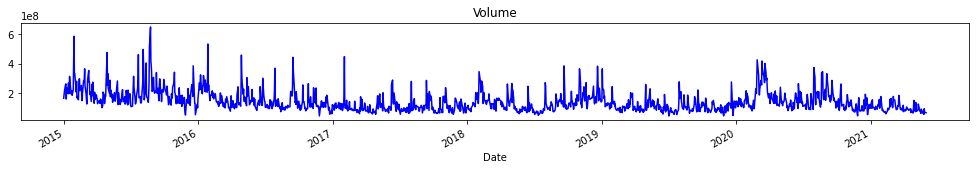

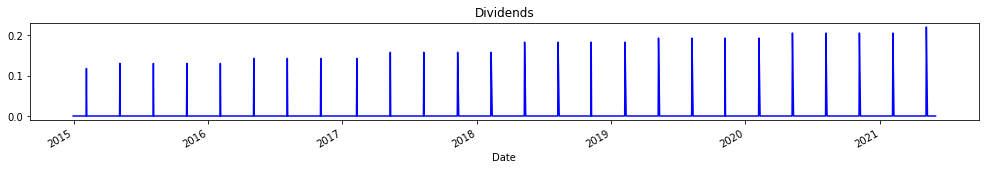

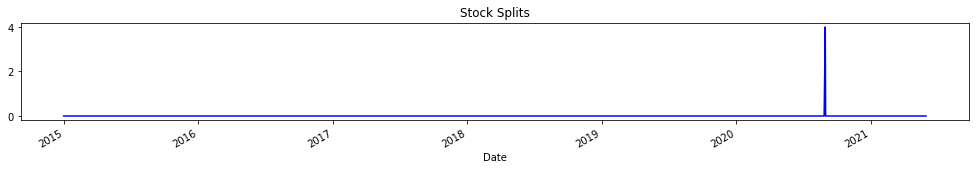

In [27]:
%matplotlib inline

for col in nio_data.columns:
    color="orange" if col == "Close" else "blue"
    apple_data[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()

## Data Preprocessing

In [28]:
nio_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,684.000000,684.000000,684.000000,684.000000,6.840000e+02,684.0,684.0
mean,14.917866,15.445716,14.320219,14.917529,6.982931e+07,0.0,0.0
std,17.129245,17.673731,16.442351,17.102900,7.438813e+07,0.0,0.0
min,1.190000,1.450000,1.190000,1.320000,5.111000e+06,0.0,0.0
25%,3.377500,3.487500,3.225000,3.340000,2.156398e+07,0.0,0.0
50%,6.525000,6.760000,6.250000,6.540000,4.800370e+07,0.0,0.0
75%,19.517500,20.594999,18.752500,19.955000,8.473468e+07,0.0,0.0
max,64.949997,66.989998,62.189999,62.840000,5.771851e+08,0.0,0.0


In [29]:
nio_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [30]:
nio_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 684 entries, 2018-09-12 to 2021-06-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          684 non-null    float64
 1   High          684 non-null    float64
 2   Low           684 non-null    float64
 3   Close         684 non-null    float64
 4   Volume        684 non-null    int64  
 5   Dividends     684 non-null    int64  
 6   Stock Splits  684 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 42.8 KB


In [31]:
nio_df = nio_data.reset_index()["Close"]
nio_df.tail()

679    36.070000
680    37.759998
681    38.910000
682    38.619999
683    42.340000
Name: Close, dtype: float64

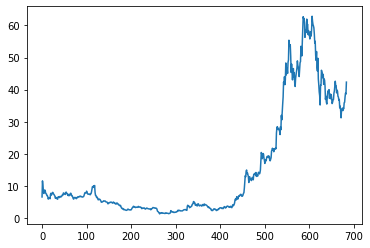

In [32]:
plt.plot(nio_df)

### Train-Test Split
To avoid data Leak, we have to split our data in a different way and also because we are dealing with a time series Problem, we have to divide in days and not randomly because the next data. depends on the value of the previous day

In [33]:
index= int(len(nio_df) * 0.8)
train = nio_df[:index]
test = nio_df[index:]

In [34]:
print(len(train))
print(len(test))

547
137


## Data Normalisation

In [35]:
scale = StandardScaler()
df1 = scale.fit_transform(np.array(train).reshape(-1,1))
df1

array([[-8.32654414e-02],
       [ 6.37630308e-01],
       [ 3.92525666e-01],
       [ 1.90674931e-01],
       [ 7.24480145e-02],
       [ 1.90674931e-01],
       [ 2.31045050e-01],
       [ 2.03651075e-01],
       [ 9.98420586e-02],
       [ 5.80301147e-02],
       [ 4.64957948e-02],
       [-2.41519489e-02],
       [-2.84773532e-02],
       [-8.32654414e-02],
       [-1.79865474e-01],
       [-1.26519141e-01],
       [-1.33728125e-01],
       [-1.32286301e-01],
       [-1.64005749e-01],
       [ 3.06360706e-02],
       [ 8.25405788e-02],
       [ 3.58446505e-04],
       [ 4.07286349e-02],
       [ 9.26331431e-02],
       [ 1.24352523e-01],
       [ 8.54241588e-02],
       [ 4.64957948e-02],
       [ 2.05435751e-02],
       [-2.12683689e-02],
       [-5.29878173e-02],
       [-1.45262445e-01],
       [-1.04892326e-01],
       [-1.19310225e-01],
       [-1.42378865e-01],
       [-1.76981894e-01],
       [-1.84190809e-01],
       [-8.03818614e-02],
       [-9.91251656e-02],
       [-7.1

In [36]:
df_test = scale.transform(np.array(test).reshape(-1,1))
df_test

array([[5.92900444],
       [5.38977478],
       [5.53683756],
       [5.68245825],
       [5.46186434],
       [5.95063153],
       [6.06597473],
       [6.94979298],
       [6.6801776 ],
       [6.70612989],
       [6.75082562],
       [6.25052384],
       [5.50511797],
       [5.88286716],
       [5.50367587],
       [5.17062242],
       [5.46907319],
       [5.67813305],
       [5.31047581],
       [5.48493298],
       [5.01779234],
       [4.8736132 ],
       [5.23694469],
       [5.40563402],
       [5.59739253],
       [5.70120169],
       [6.02272109],
       [5.82519583],
       [5.74301322],
       [5.5642314 ],
       [5.31768521],
       [5.61757752],
       [5.94053903],
       [5.99244361],
       [6.6772945 ],
       [6.63548242],
       [6.24619865],
       [6.7911956 ],
       [7.46018671],
       [8.00518422],
       [7.91002601],
       [7.9258858 ],
       [7.74133613],
       [7.07811233],
       [7.39098079],
       [7.28573008],
       [7.37656309],
       [7.897

## Data Sequencing
We need to sequence our data into three dimension because recurrent neural network can only take inputs in three dimensions(matrix).

Timesteps is the number of days(values) that we consider to predict the next one. The previous data will be X_train and the predicted or next data after the timestep will be the y_train

In [37]:
#= sequencing the data: converting an array of values into a matrix dataset

# def create_sequence(df, time_step=1):
   
#    X_train, y_train = [], []
   
#    for i in range(len(df)- time_step -1):
       
#        a = df[i: (i + time_step), 0]
       
#        X_train.append(a)
       
#        y_train.append(df[i + time_step, 0])
    
#     return np.array(X_train), np.array(y_train)

In [38]:
# #reshape df into X=t, t+1, t+2, t+3... and Y=t+4
# time_step=100
# X_train, y_train = create_sequence(df1, time_step)
# X_test, y_test = create_sequence(df_test, time_step)

In [39]:
# # reshape inut to be [samples, timesteps and features] which is required for LSTM
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [40]:

#= sequencing the data: converting an array of values into a matrix dataset

def create_sequence(df, n_lookback, n_future):
    X_train, y_train = [], []
    for i in range(n_lookback, len(df) - n_future + 1):
        X_train.append(df[i - n_lookback:i, 0:df.shape[1]]) 
        y_train.append(df[i + n_future - 1:i + n_future, 0])
    return np.array(X_train), np.array(y_train)

In [41]:
X_train, y_train = create_sequence(df1, 15,1)

In [42]:
print(f"y_train shape:, {y_train.shape}")
print(f"X_train shape:, {X_train.shape}")

y_train shape:, (532, 1)
X_train shape:, (532, 15, 1)


In [43]:
X_test, y_test = create_sequence(df_test, 15,1)

### Baseline Score

In [44]:
# We here decide to predict the mean of the train set y_train
y_pred = np.mean([_ for elt in y_train for _ in elt])
bench_res = np.mean(np.abs([_-y_pred for elt in y_test for _ in elt]))

print(f'Benchmark MAE on the test set : {bench_res:.4f}')

Benchmark MAE on the test set : 5.5202


### LSTM Model

In [45]:
def init_model():
    
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(40, return_sequences=True, activation='tanh'))
    model.add(LSTM(30, return_sequences=True, activation='tanh'))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', 
                  optimizer=RMSprop(learning_rate=0.0003), 
                  metrics=['mae'])
    
    return model


In [46]:
model2 = init_model()
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 15, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 15, 40)            14560     
_________________________________________________________________
lstm_4 (LSTM)                (None, 15, 30)            8520      
_________________________________________________________________
dense_2 (Dense)              (None, 15, 5)             155       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 15, 1)             6         
Total params: 33,641
Trainable params: 33,641
Non-trainable params: 0
__________________________________________________

In [47]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

history = model2.fit(X_train, y_train,validation_split=(0.2),epochs=1000, batch_size=32,callbacks=[es], verbose=1)

Epoch 1/1000
14/14 [==============================] - 7s 120ms/step - loss: 0.2500 - mae: 0.4408 - val_loss: 4.0975 - val_mae: 1.6049
Epoch 2/1000
14/14 [==============================] - 1s 43ms/step - loss: 0.1819 - mae: 0.3646 - val_loss: 4.0804 - val_mae: 1.6131
Epoch 3/1000
14/14 [==============================] - 1s 49ms/step - loss: 0.1227 - mae: 0.2801 - val_loss: 4.0615 - val_mae: 1.6177
Epoch 4/1000
14/14 [==============================] - 1s 50ms/step - loss: 0.1229 - mae: 0.2814 - val_loss: 4.0568 - val_mae: 1.6183
Epoch 5/1000
14/14 [==============================] - 1s 46ms/step - loss: 0.1129 - mae: 0.2647 - val_loss: 4.0418 - val_mae: 1.6184
Epoch 6/1000
14/14 [==============================] - 1s 46ms/step - loss: 0.1071 - mae: 0.2537 - val_loss: 4.0358 - val_mae: 1.6157
Epoch 7/1000
14/14 [==============================] - 1s 49ms/step - loss: 0.0945 - mae: 0.2317 - val_loss: 4.0323 - val_mae: 1.6155
Epoch 8/1000
14/14 [==============================] - 1s 48ms/step -

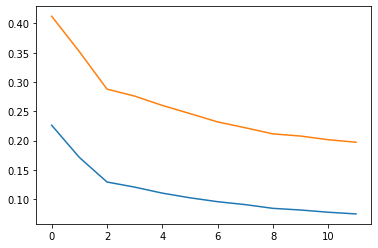

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])

In [49]:
res = model2.evaluate(X_test, y_test, verbose=0)

print(f'MAE on the test set : {res[1]:.4f}, or {res[1]/bench_res:.2f} times the benchmark')


MAE on the test set : 5.4518, or 0.99 times the benchmark


### Prediction

In [50]:
y_pred = model2.predict(X_test)
y_pred

array([[[-0.02780174],
        [-0.02240036],
        [-0.01524328],
        ...,
        [ 0.12948392],
        [ 0.13371873],
        [ 0.13694972]],

       [[-0.02797457],
        [-0.02269844],
        [-0.01558484],
        ...,
        [ 0.1290433 ],
        [ 0.13336058],
        [ 0.13662934]],

       [[-0.02792484],
        [-0.02259069],
        [-0.01544872],
        ...,
        [ 0.12891936],
        [ 0.1332277 ],
        [ 0.13656214]],

       ...,

       [[-0.02830124],
        [-0.02375106],
        [-0.01710052],
        ...,
        [ 0.12796162],
        [ 0.1327893 ],
        [ 0.1365921 ]],

       [[-0.02830124],
        [-0.02379895],
        [-0.01719492],
        ...,
        [ 0.12783955],
        [ 0.13273808],
        [ 0.13659336]],

       [[-0.02916001],
        [-0.02413428],
        [-0.0175511 ],
        ...,
        [ 0.12754712],
        [ 0.13254894],
        [ 0.13644391]]], dtype=float32)